## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi
 

## I. Importing essential libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['logistic_regression_model_ML(300).pkl', 'logistic_regression_model_ML(3).pkl', 'knn_model_ML.pkl', '.virtual_documents', 'logistic_regression_model.pkl', 'xgboost_model_ML(3).json', 'knn_model_ML(300).pkl', 'random_forest_model_ML(2).pkl', 'random_forest_model_CDD(no_CV).pkl', 'svm_model_ML(2).pkl', 'svm_model_UCI(300).pkl', 'decision_tree_model_ML(2).pkl', 'random_forest_model_CDD(3000-synthetic).pkl', 'random_forest_regularized.pkl', 'random_forest_model.pkl', 'xgboost_model_ML(300_UCI).json', 'decision_tree(2).pkl', 'svm_model_ML.pkl', 'state.db', 'logistic_regression_model_ML.pkl', 'xgboost_model_ML(3000_synthetic).json', 'random_forest_model_ML.pkl', 'decision_tree_model_ML(3).pkl', 'xgboost_model.json', 'xgboost_regularized.pkl', 'decision_tree.pkl', 'logistic_regression_model_ML(2).pkl', 'svm_model_CDD(No_CV).pkl', 'xgboost_model_ML.json', 'xgb_model.pkl', 'random_forest_model_ML(3).pkl', 'decision_tree_model.pkl', 'random_forest_model_UCI(300).pkl', 'svm_model_CDD(3000).pkl',

## II. Importing and understanding our dataset 

In [90]:
dataset = pd.read_csv("/kaggle/input/khyanhdep/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [91]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [92]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [93]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
267,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1


#### Description

In [193]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,52.384667,0.666667,0.987333,132.405333,248.228333,0.195000,0.603333,134.117000,0.341000,0.804473,1.298667,0.900000,2.277667,0.691000
std,11.463209,0.471483,1.051764,17.941804,57.725196,0.396267,0.557458,29.579266,0.474124,1.163133,0.640001,1.158928,0.717453,0.462158
min,21.000000,0.000000,0.000000,88.000000,93.000000,0.000000,0.000000,54.000000,0.000000,-0.476298,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,122.000000,207.000000,0.000000,0.000000,115.000000,0.000000,0.007661,1.000000,0.000000,2.000000,0.000000
50%,53.000000,1.000000,1.000000,130.000000,247.500000,0.000000,1.000000,135.000000,0.000000,0.203268,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,289.000000,0.000000,1.000000,155.000000,1.000000,1.377935,2.000000,2.000000,3.000000,1.000000
max,81.000000,1.000000,3.000000,215.000000,610.000000,1.000000,2.000000,215.000000,1.000000,6.388983,2.000000,4.000000,3.000000,1.000000


In [194]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3000 non-null   int64  
 1   sex       3000 non-null   int64  
 2   cp        3000 non-null   int64  
 3   trestbps  3000 non-null   int64  
 4   chol      3000 non-null   int64  
 5   fbs       3000 non-null   int64  
 6   restecg   3000 non-null   int64  
 7   thalach   3000 non-null   int64  
 8   exang     3000 non-null   int64  
 9   oldpeak   3000 non-null   float64
 10  slope     3000 non-null   int64  
 11  ca        3000 non-null   int64  
 12  thal      3000 non-null   int64  
 13  target    3000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 328.2 KB


In [195]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [196]:
dataset.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,61,0,2,137,221,0,0,84,0,0.209765,1,0,2,1
1,39,1,0,144,227,0,0,114,1,0.073327,1,0,2,0
2,69,0,2,160,346,0,1,132,0,1.616111,0,2,3,0
3,43,1,3,126,261,0,0,133,0,0.058115,1,0,2,0
4,48,0,3,122,339,1,1,143,1,0.857885,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,54,0,0,123,250,0,0,137,0,0.111477,2,0,2,0
2996,50,0,1,105,320,0,0,139,0,0.312168,1,0,1,1
2997,66,0,0,130,117,0,1,98,0,1.167432,2,2,3,1
2998,51,0,1,121,195,0,1,78,0,0.199368,2,0,1,1


In [97]:
target_valid=[0,1]
target_invalid = dataset[~dataset['target'].isin(target_valid)]
print(target_invalid)

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


#### Let's understand our columns better:

In [12]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [98]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
dataset["target"].unique()

array([0, 1])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [95]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### 

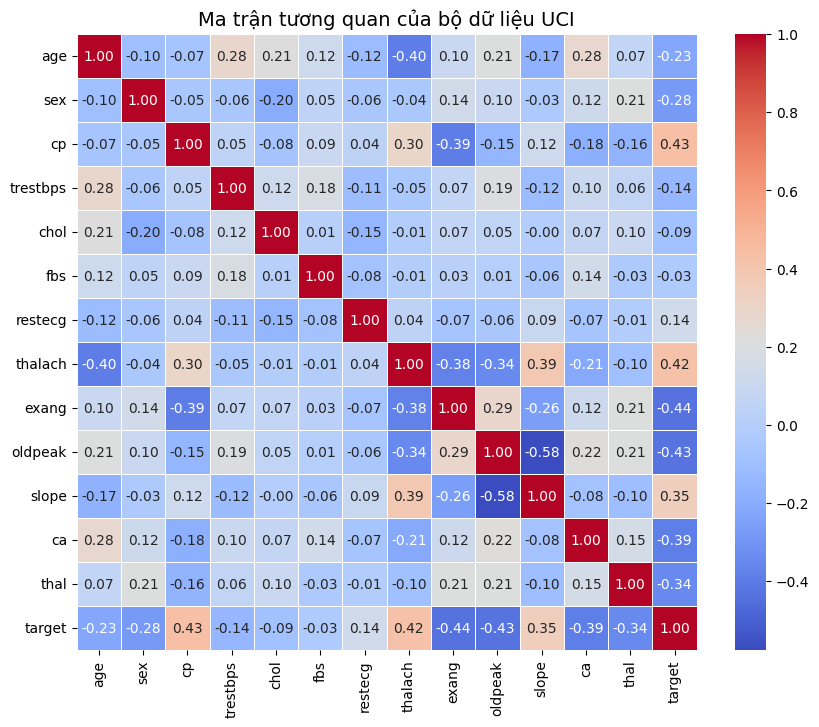

In [96]:
corr_matrix = dataset.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tiêu đề
plt.title("Ma trận tương quan của bộ dữ liệu UCI", fontsize=14)

# Hiển thị biểu đồ
plt.show()

In [ ]:
print(dataset["target"].value_counts())

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

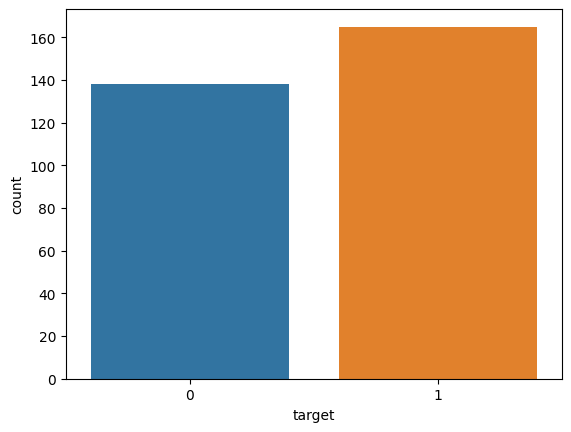

target
1    165
0    138
Name: count, dtype: int64


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

y = dataset["target"]

sns.countplot(x=y)  # Đảm bảo dùng x=y
plt.show()  # Thêm plt.show() để hiển thị biểu đồ trong một số trường hợp

target_temp = dataset.target.value_counts()
print(target_temp)

In [100]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

##### We notice, that as expected, the 'sex' feature has 2 unique features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=dataset["sex"], y=y)  # Định rõ x và y
plt.show()  # Hiển thị biểu đồ

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [ ]:
dataset["cp"].unique()

##### As expected, the CP feature has values from 0 to 3

In [ ]:
sns.barplot(x=dataset["cp"],y=y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
dataset["fbs"].describe()

In [ ]:
dataset["fbs"].unique()

In [ ]:
sns.barplot(x=dataset["fbs"],y=y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

In [ ]:
sns.barplot(x=dataset["restecg"],y=y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

In [ ]:
sns.barplot(x=dataset["exang"],y=y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

In [ ]:
sns.barplot(x=dataset["slope"],y=y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the Age feature

In [101]:
dataset["age"].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

Mean age: 54.366336633663366
Variance of age: 82.48455838961381
Minimum age: 29
Maximum age: 77


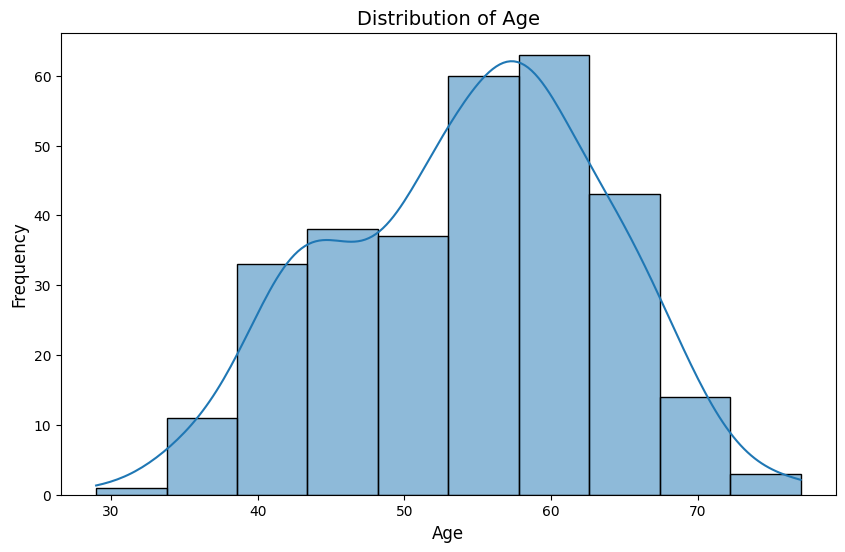

In [102]:
mean_age = dataset["age"].mean()
var_age = dataset["age"].var()
min_age = dataset["age"].min()
max_age = dataset["age"].max()
print(f"Mean age: {mean_age}")
print(f"Variance of age: {var_age}")
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
plt.figure(figsize=(10,6))
sns.histplot(dataset["age"], bins=10, kde=True)

# Thiết lập tiêu đề và nhãn
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

### Analysing the 'ca' feature

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

In [ ]:
sns.countplot(dataset["ca"])

In [ ]:
sns.barplot(x=dataset["ca"],y=y)

##### ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [ ]:
dataset["thal"].unique()

In [ ]:
sns.barplot(x=dataset["thal"],y=y)

In [ ]:
sns.distplot(dataset["thal"])

### Prep

In [4]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    105
0    100
Name: count, dtype: int64


## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### K Nearest Neighbors

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss, confusion_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")

In [104]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/khyanhdep/heart.csv")

In [105]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [106]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    32
0    29
Name: count, dtype: int64


In [109]:
# Khởi tạo và huấn luyện mô hình KNN trên dữ liệu đã chuẩn hóa
knn = KNeighborsClassifier(
    n_neighbors=7,        # tăng lên để tránh overfit
    weights='distance',   # giảm ảnh hưởng của hàng xóm xa
    metric='minkowski'    # chuẩn mặc định
)
  # Sử dụng 5 hàng xóm gần nhất
start_time = time.time()  # Bắt đầu đo thời gian
knn.fit(X_train_scaled, y_train)  # Sửa: Dùng X_train_scaled (đã chuẩn hóa)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)

In [111]:
# Dự đoán trên tập kiểm tra (dùng dữ liệu đã chuẩn hóa)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [112]:
# Tính các chỉ số đánh giá cho KNN (bao gồm MAE, RMSE, Log Loss, và Training Time)
knn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1": f1_score(y_test, y_pred_knn),
    "Log Loss": log_loss(y_test, y_prob_knn),
    "Training Time (s)": training_time
}

In [113]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình K-Nearest Neighbors (KNN) ===")
results_df_knn = pd.DataFrame(knn_metrics, index=["KNN"])
print(results_df_knn)

=== Kết quả đánh giá mô hình K-Nearest Neighbors (KNN) ===
     Accuracy  Precision  Recall        F1  Log Loss  Training Time (s)
KNN  0.901639   0.933333   0.875  0.903226  0.856322           0.001429


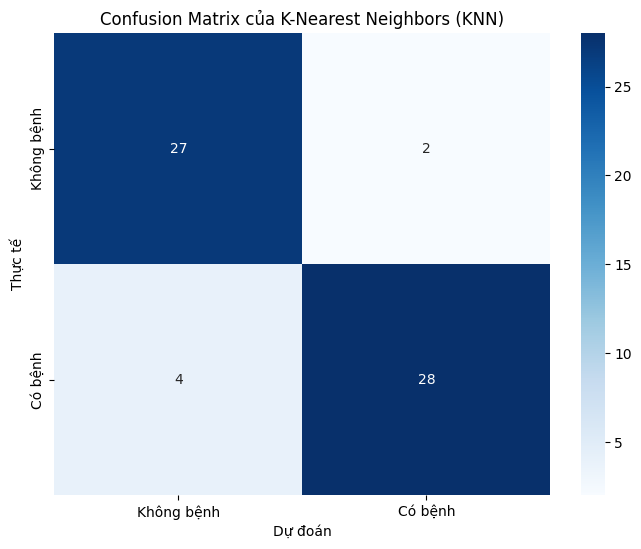

In [114]:
# Vẽ Confusion Matrix cho KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của K-Nearest Neighbors (KNN)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

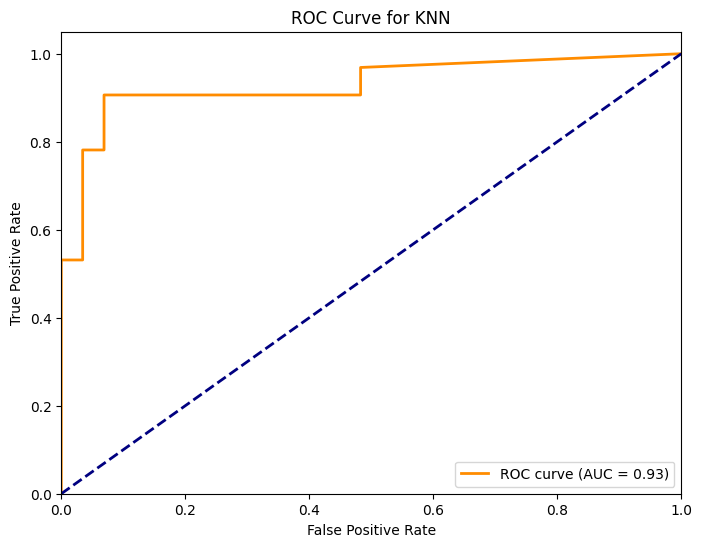

In [115]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

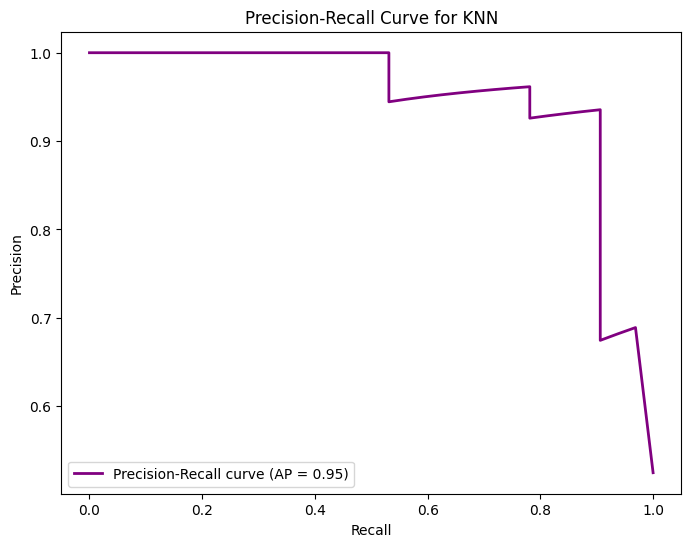

In [116]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_knn)
ap_score = average_precision_score(y_test, y_prob_knn)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.legend(loc="lower left")
plt.show()

In [117]:
# Lưu mô hình KNN
model_filename_knn = "/kaggle/working/knn_model_ML(300(1)).pkl"
joblib.dump(knn, model_filename_knn)
print(f"✅ Mô hình KNN đã được lưu tại: {model_filename_knn}")

✅ Mô hình KNN đã được lưu tại: /kaggle/working/knn_model_ML(300(1)).pkl


### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # Thay SVM bằng Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, log_loss, confusion_matrix
import joblib

In [2]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/augmentation-data/augmented_804_heart_dataset.csv")

In [3]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [4]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    94
0    67
Name: count, dtype: int64


In [6]:
# Khởi tạo và huấn luyện mô hình Logistic Regression
lr = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
start_time = time.time()  # Bắt đầu đo thời gian
lr.fit(X_train_scaled, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)

In [7]:
# Cross Validation
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(lr, X_train_scaled, y_train, cv=5, scoring=scoring, return_train_score=False)

# Tính trung bình và độ lệch chuẩn
metrics = {
    "Accuracy": cv_results['test_accuracy'].mean(),
    "Accuracy Std": cv_results['test_accuracy'].std(),
    "Precision": cv_results['test_precision'].mean(),
    "Precision Std": cv_results['test_precision'].std(),
    "Recall": cv_results['test_recall'].mean(),
    "Recall Std": cv_results['test_recall'].std(),
    "F1": cv_results['test_f1'].mean(),
    "F1 Std": cv_results['test_f1'].std(),
    "Training Time (s)": training_time
}

# Dự đoán trên tập kiểm tra
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:, 1]
metrics["Log Loss"] = log_loss(y_test, y_prob)

# Hiển thị kết quả
results_df = pd.DataFrame(metrics, index=["Logistic Regression"])
print("\n=== Kết quả đánh giá Logistic Regression (5-fold Cross Validation) ===")
print(results_df)

# Accuracy tập huấn luyện vs kiểm tra
train_pred = lr.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy trên tập huấn luyện: {train_accuracy:.4f}")
print(f"Accuracy trên tập kiểm tra: {test_accuracy:.4f}")



=== Kết quả đánh giá Logistic Regression (5-fold Cross Validation) ===
                     Accuracy  Accuracy Std  Precision  Precision Std  \
Logistic Regression  0.643217      0.034069   0.655422       0.023974   

                       Recall  Recall Std        F1    F1 Std  \
Logistic Regression  0.786301    0.039322  0.714633  0.027404   

                     Training Time (s)  Log Loss  
Logistic Regression            0.04133  0.641475  
Accuracy trên tập huấn luyện: 0.6698
Accuracy trên tập kiểm tra: 0.6522


In [ ]:
# Sử dụng Cross-Validation để đánh giá
# cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
# lr_metrics["CV_Accuracy"] = cv_scores_lr.mean()

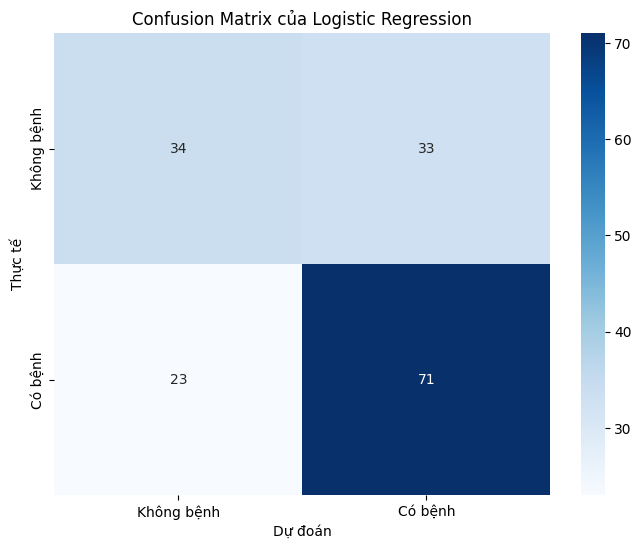

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Logistic Regression")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

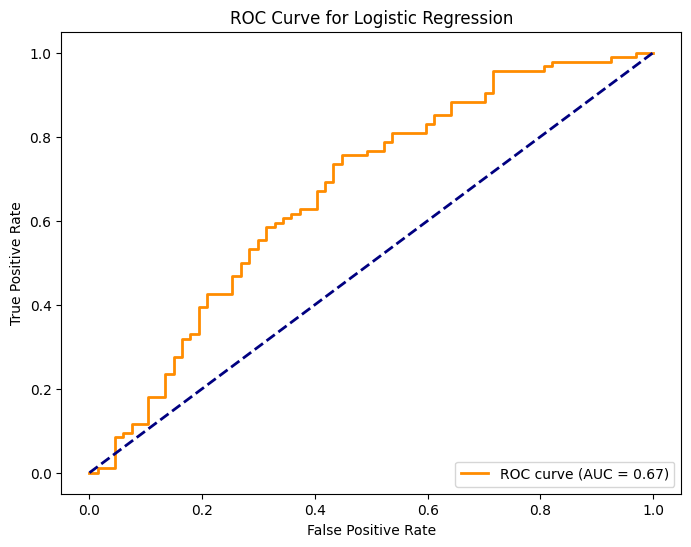

In [9]:
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

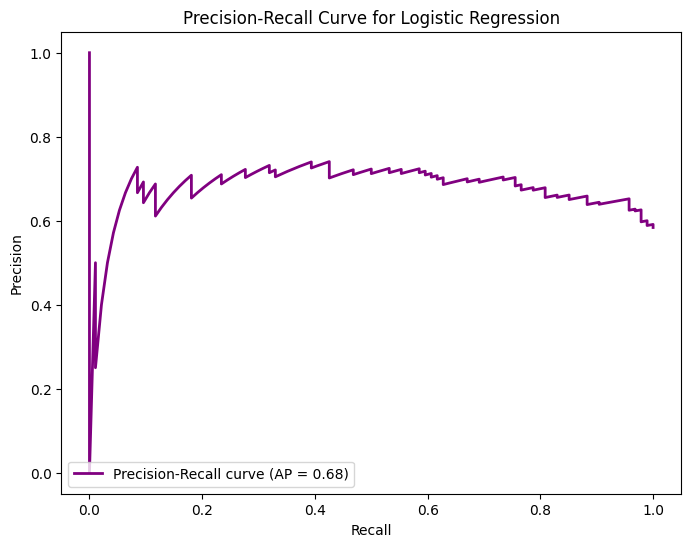

In [10]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="lower left")
plt.show()

In [11]:
# Lưu mô hình Logistic Regression
# model_filename_lr = "/kaggle/working/logistic_regression_model_augmented804.pkl"
# joblib.dump(lr, model_filename_lr)
scaler_filename_lr = "/kaggle/working/scaler_logistic_regression_model_ML(8001).pkl"
joblib.dump(scaler, scaler_filename_lr)
print(f"✅ Scaler đã được lưu tại: {scaler_filename_lr}")
print(f"✅ Mô hình Logistic Regression đã được lưu tại: {model_filename_lr}")

✅ Scaler đã được lưu tại: /kaggle/working/scaler_logistic_regression_model_ML(8001).pkl
✅ Mô hình Logistic Regression đã được lưu tại: /kaggle/working/logistic_regression_model_augmented804.pkl


### SVM

In [12]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib

In [13]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/augmentation-data/augmented_804_heart_dataset.csv")

In [14]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [15]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    94
0    67
Name: count, dtype: int64


In [17]:

# Khởi tạo và huấn luyện mô hình SVM
svm = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True,
    class_weight='balanced',
    random_state=42
)
start_time = time.time()  # Bắt đầu đo thời gian
svm.fit(X_train, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)

In [18]:
# Dự đoán trên tập kiểm tra
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [19]:
# Tính các chỉ số đánh giá
svm_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1": f1_score(y_test, y_pred_svm),
    "Log Loss": log_loss(y_test, y_prob_svm),
    "Training Time (s)": training_time
}

In [20]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình Support Vector Machine (SVM) ===")
results_df_svm = pd.DataFrame(svm_metrics, index=["SVM"])
print(results_df_svm)

=== Kết quả đánh giá mô hình Support Vector Machine (SVM) ===
     Accuracy  Precision    Recall        F1  Log Loss  Training Time (s)
SVM  0.459627   0.561404  0.340426  0.423841  0.679024           0.122362


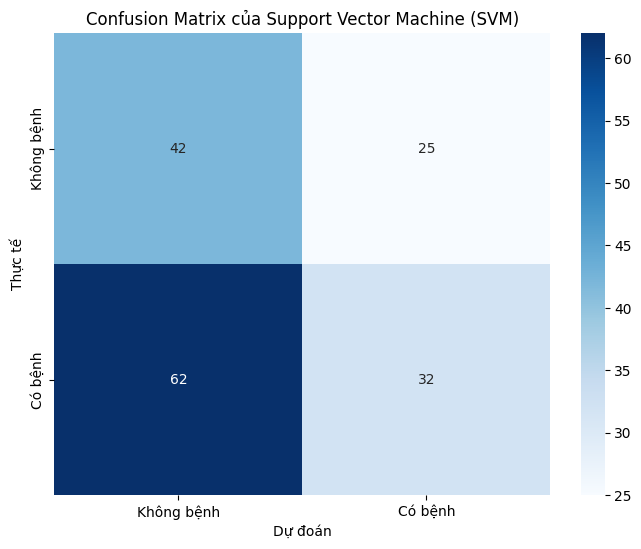

In [21]:
# Vẽ Confusion Matrix cho SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Support Vector Machine (SVM)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

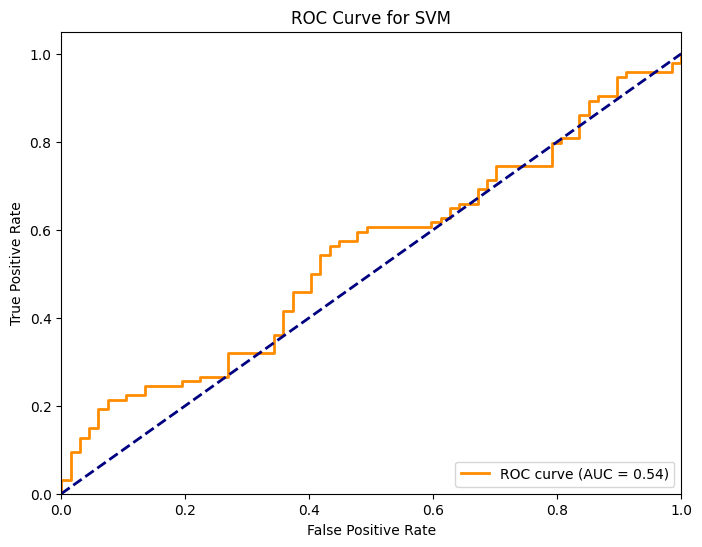

In [22]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

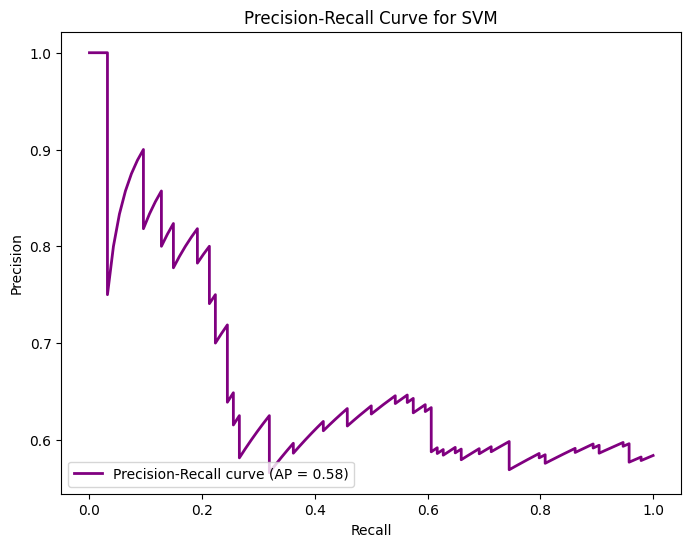

In [23]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_svm)
ap_score = average_precision_score(y_test, y_pred_svm)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc="lower left")
plt.show()

In [24]:
# Lưu mô hình SVM
# model_filename_svm = "/kaggle/working/svm_model_UCI(800).pkl"
# joblib.dump(svm, model_filename_svm)
scaler_filename_lr = "/kaggle/working/scaler_svm_model_ML(8001).pkl"
joblib.dump(scaler, scaler_filename_lr)
print(f"✅ Scaler đã được lưu tại: {scaler_filename_lr}")
print(f"✅ Mô hình SVM đã được lưu tại: {model_filename_svm}")

✅ Scaler đã được lưu tại: /kaggle/working/scaler_svm_model_ML(8001).pkl
✅ Mô hình SVM đã được lưu tại: /kaggle/working/svm_model_UCI(800).pkl


### XG Boost

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib
from sklearn.model_selection import GridSearchCV

In [2]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/augmentation-data/augmented_804_heart_dataset.csv")

In [3]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [4]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    94
0    67
Name: count, dtype: int64


In [7]:
# Khởi tạo mô hình XGBoost
xgb = XGBClassifier(
    n_estimators=50,       # Số lượng cây
    max_depth=5,           # Độ sâu tối đa của cây
    learning_rate=0.1,     # Tốc độ học
    random_state=42,
    eval_metric='logloss'  # Đặt metric để tránh cảnh báo
)


# Đo thời gian huấn luyện
start_time = time.time()
xgb.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

print(f"Thời gian huấn luyện XGBoost: {training_time:.2f} giây")

Thời gian huấn luyện XGBoost: 0.04 giây


In [8]:
# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [9]:
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1": f1_score(y_test, y_pred_xgb),
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    "Log Loss": log_loss(y_test, y_prob_xgb),
    "Training Time (s)": training_time
}

In [10]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=cv, scoring='accuracy')
xgb_metrics["CV Accuracy (5-fold)"] = cv_scores.mean()
print(f"✅ Cross-validation accuracy: {cv_scores.mean():.4f}")

NameError: name 'StratifiedKFold' is not defined

In [11]:
# Hiển thị kết quả dưới dạng bảng
print("\n=== Kết quả đánh giá mô hình XGBoost ===")
results_df_xgb = pd.DataFrame(xgb_metrics, index=["XGBoost"])
print(results_df_xgb)


=== Kết quả đánh giá mô hình XGBoost ===
         Accuracy  Precision    Recall        F1       MAE     RMSE  Log Loss  \
XGBoost  0.645963   0.707865  0.670213  0.688525  0.354037  0.59501  0.649822   

         Training Time (s)  
XGBoost           0.042662  


In [12]:
# Kiểm tra overfitting
train_pred_xgb = xgb.predict(X_train_scaled)
train_accuracy_xgb = accuracy_score(y_train, train_pred_xgb)
print(f"Accuracy trên tập huấn luyện: {train_accuracy_xgb:.4f}")
print(f"Accuracy trên tập kiểm tra: {xgb_metrics['Accuracy']:.4f}")

Accuracy trên tập huấn luyện: 0.9408
Accuracy trên tập kiểm tra: 0.6460


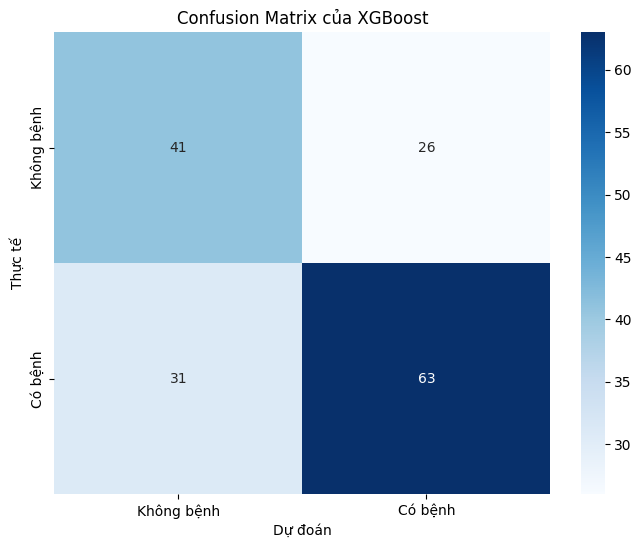

In [13]:
# Vẽ Confusion Matrix cho XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của XGBoost")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

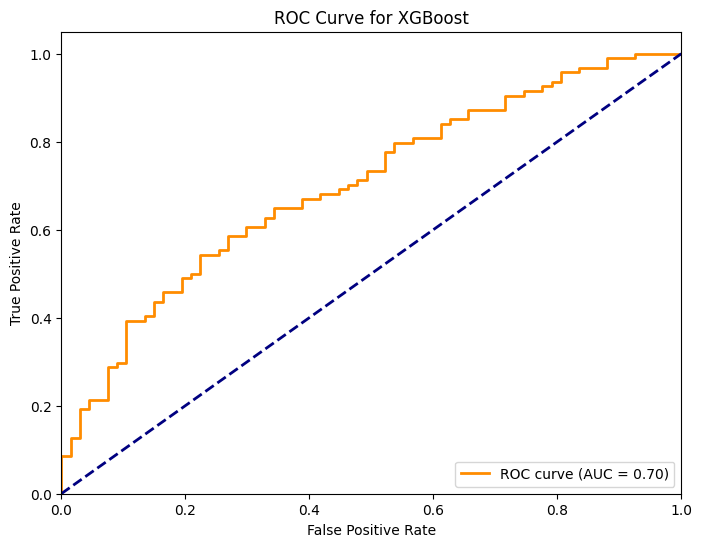

In [14]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

### 

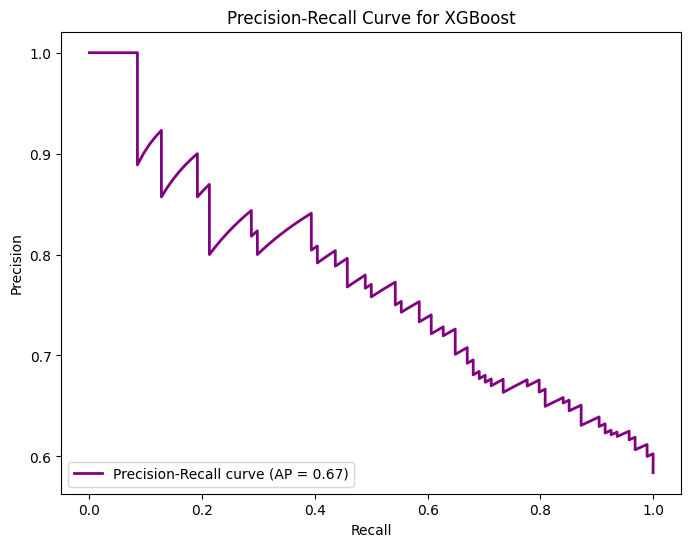

In [15]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
ap_score = average_precision_score(y_test, y_pred_xgb)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc="lower left")
plt.show()

In [16]:
# Lưu mô hình XGBoost dưới dạng JSON
model_filename_xgb = "/kaggle/working/xgboost_model_ML(800).json"
xgb.save_model(model_filename_xgb)  # Sử dụng phương thức save_model của XGBoost để lưu dưới dạng JSON
print(f"✅ Mô hình XGBoost đã được lưu dưới dạng JSON tại: {model_filename_xgb}")

✅ Mô hình XGBoost đã được lưu dưới dạng JSON tại: /kaggle/working/xgboost_model_ML(800).json


### Decision Tree

In [170]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib
from sklearn.model_selection import GridSearchCV

In [171]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/khyanhdep/heart.csv")

In [172]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [173]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

In [175]:
# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    32
0    29
Name: count, dtype: int64


In [176]:
param_grid = {
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_

Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [177]:
# Khởi tạo và huấn luyện mô hình Decision Tree
dt = DecisionTreeClassifier(
    max_depth=5,              # tăng độ sâu nhẹ
    min_samples_split=3,      # giảm ràng buộc chia nhánh
    min_samples_leaf=2,       # giảm kích thước lá
    class_weight='balanced',  # xử lý mất cân bằng
    random_state=42
)

start_time = time.time()  # Bắt đầu đo thời gian
dt.fit(X_train_scaled, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)


In [154]:
# Dự đoán trên tập kiểm tra
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [155]:
# Tính các chỉ số đánh giá
dt_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1": f1_score(y_test, y_pred_dt),
    "Log Loss": log_loss(y_test, y_prob_dt),
    "Training Time (s)": training_time
}

In [ ]:
# Sử dụng Cross-Validation để đánh giá
# cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
# dt_metrics["CV_Accuracy"] = cv_scores_dt.mean()

In [156]:
# Hiển thị kết quả dưới dạng bảng
print("\n=== Kết quả đánh giá mô hình Decision Tree ===")
results_df_dt = pd.DataFrame(dt_metrics, index=["Decision Tree"])
print(results_df_dt)


=== Kết quả đánh giá mô hình Decision Tree ===
               Accuracy  Precision  Recall        F1  Log Loss  \
Decision Tree  0.868852   0.928571  0.8125  0.866667   3.08838   

               Training Time (s)  
Decision Tree           0.003423  


In [157]:
# Kiểm tra overfitting
train_pred_dt = dt.predict(X_train_scaled)
train_accuracy_dt = accuracy_score(y_train, train_pred_dt)
print(f"Accuracy trên tập huấn luyện: {train_accuracy_dt:.4f}")
print(f"Accuracy trên tập kiểm tra: {dt_metrics['Accuracy']:.4f}")

Accuracy trên tập huấn luyện: 0.9174
Accuracy trên tập kiểm tra: 0.8689


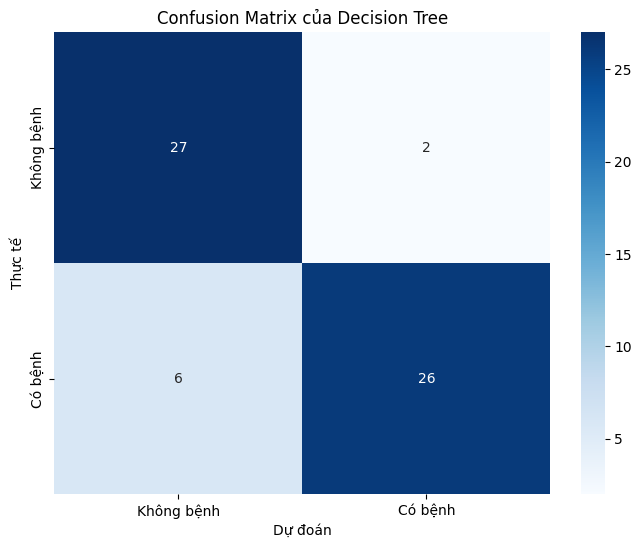

In [158]:
# Vẽ Confusion Matrix cho Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Decision Tree")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

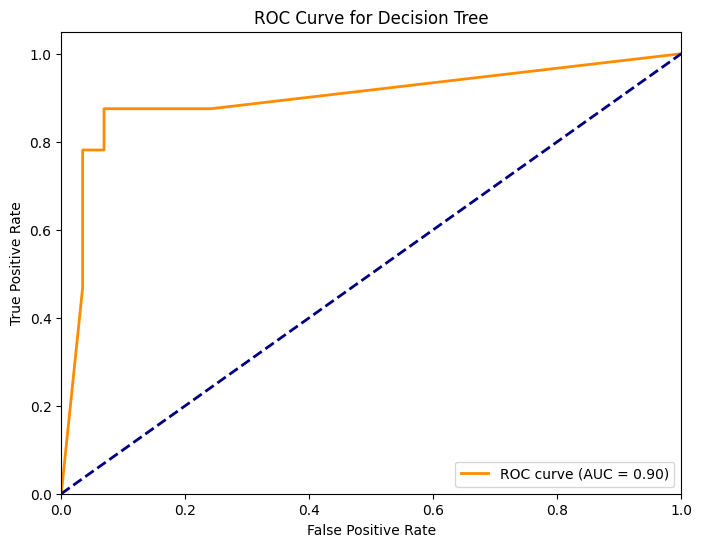

In [159]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

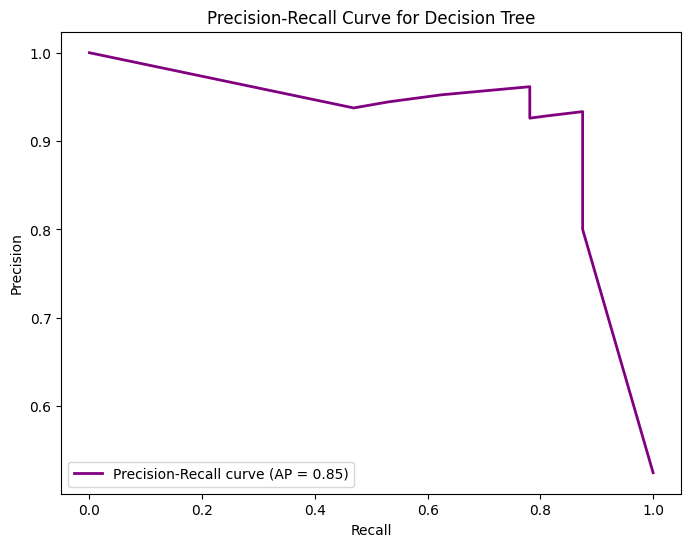

In [160]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_dt)
ap_score = average_precision_score(y_test, y_pred_dt)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc="lower left")
plt.show()

In [161]:
# Lưu mô hình Decision Tree
model_filename_dt = "/kaggle/working/decision_tree_model_ML(300(1)).pkl"
joblib.dump(dt, model_filename_dt)
print(f"✅ Mô hình Decision Tree đã được lưu tại: {model_filename_dt}")

✅ Mô hình Decision Tree đã được lưu tại: /kaggle/working/decision_tree_model_ML(300(1)).pkl


### Random Forest

In [118]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib

In [119]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/khyanhdep/heart.csv")

In [120]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [121]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

In [123]:
# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    32
0    29
Name: count, dtype: int64


In [124]:
rf = RandomForestClassifier(
    n_estimators=100,         # tăng số lượng cây cho ổn định hơn
    max_depth=6,              # tăng độ sâu nhẹ
    min_samples_split=4,      # giảm điều kiện split
    min_samples_leaf=2,       # giữ nguyên
    class_weight='balanced',  # rất cần thiết
    random_state=42
)


start_time = time.time()  # Bắt đầu đo thời gian
rf.fit(X_train_scaled, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)


In [125]:
# Dự đoán trên tập kiểm tra
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [126]:
# Tính các chỉ số đánh giá
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf),
    "Log Loss": log_loss(y_test, y_prob_rf),
    "Training Time (s)": training_time
}

In [10]:
# Sử dụng Cross-Validation để đánh giá
# cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
# rf_metrics["CV_Accuracy"] = cv_scores_rf.mean()

In [127]:
# Hiển thị kết quả dưới dạng bảng
print("\n=== Kết quả đánh giá mô hình Random Forest ===")
results_df_rf = pd.DataFrame(rf_metrics, index=["Random Forest"])
print(results_df_rf)



=== Kết quả đánh giá mô hình Random Forest ===
               Accuracy  Precision   Recall        F1  Log Loss  \
Random Forest  0.868852   0.852941  0.90625  0.878788  0.358409   

               Training Time (s)  
Random Forest           0.140621  


In [128]:
# Kiểm tra overfitting
train_pred_rf = rf.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(y_train, train_pred_rf)
print(f"Accuracy trên tập huấn luyện: {train_accuracy_rf:.4f}")
print(f"Accuracy trên tập kiểm tra: {rf_metrics['Accuracy']:.4f}")

Accuracy trên tập huấn luyện: 0.9669
Accuracy trên tập kiểm tra: 0.8689


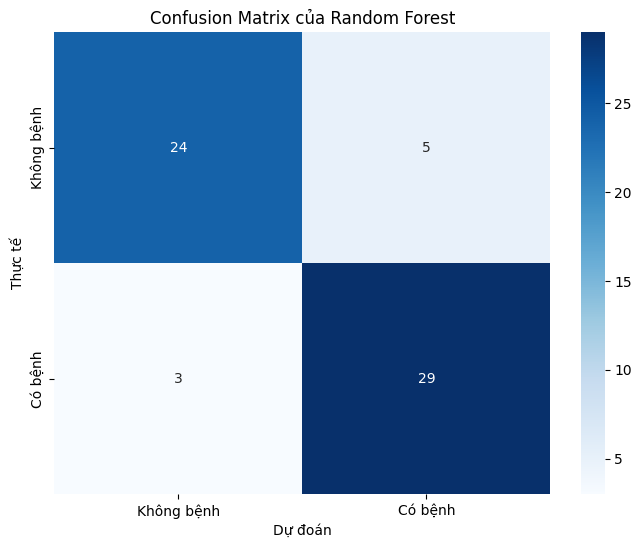

In [129]:
# Vẽ Confusion Matrix cho Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Random Forest")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

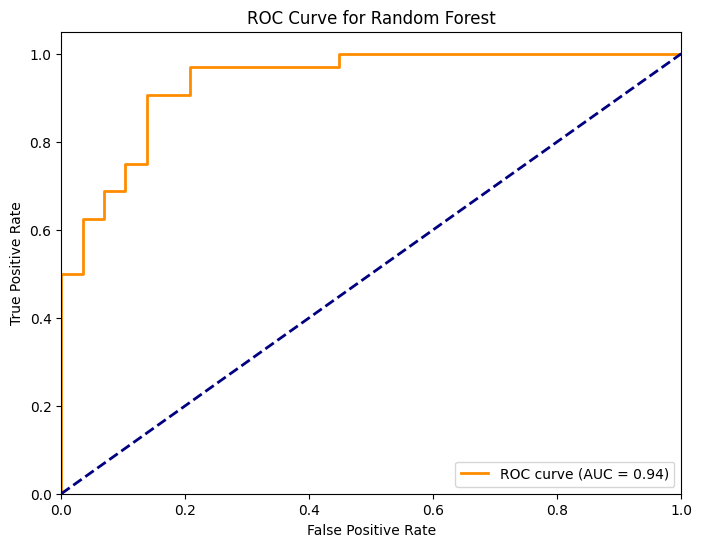

In [130]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

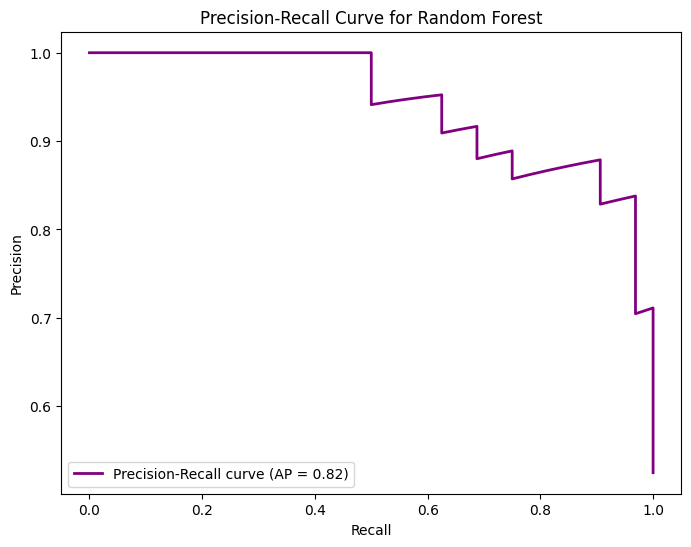

In [131]:
# Vẽ Precision-Recall Curve`
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
ap_score = average_precision_score(y_test, y_pred_rf)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc="lower left")
plt.show()

In [132]:
# Lưu mô hình Random Forest
model_filename_rf = "/kaggle/working/random_forest_model_UCI(300(1)).pkl"
joblib.dump(rf, model_filename_rf)
print(f"✅ Mô hình Random Forest đã được lưu tại: {model_filename_rf}")

✅ Mô hình Random Forest đã được lưu tại: /kaggle/working/random_forest_model_UCI(300(1)).pkl


## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>